# Netflix Data Analysis

Netflix is known for its work in data science, Al, and ML, particularly for building strong
recommendation models and algorithms that understand customer behavior and patterns.
Suppose you are working in a data-driven job role, and you have a dataset of more than
9,000 movies. You need to solve the following questions to help the company make
informed business decisions accordingly.

1) What is the most frequent genre of movies released on netflix?
2) What has highest votes in vote svg column?
3) What movie got the highest popularity? What's its genre?
4) What movie got the lowest popularity? What's its genre?
5) Which year has the most filmed movies?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('Netflix_dataset.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [42]:
df.info() #Key Basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [43]:
df.describe() #Basic statistical info about the data

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [44]:
df.duplicated().sum() # there are no duplicate values in the datset

0

**Exploration Summary**
> We have a dataframe consisting of 9827 rows and 9 columns. \n

> Our dataset looks a bit tidy with no Nulls and no duplicated values. \n

> Release_Date column needs to be casted into date time and to extract only the year value. \n

> Overview, Original _ Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.\n

> There is noticable outliers in Popularity column. \n

> Vote_Average bettter be categorised for proper analysis. \n

> Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration. \n

### Data Preprocessing

In [45]:
# Need to convert datatype of year from object to datetime

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)
df.info()

#converted datatype to datetime

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [46]:
#We need only the year of the release date

df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

# we need only year which is an integer now we can see the datatype is converted to an integer

dtype('int64')

In [47]:
df.head()

#We can now see the Release_Date column has only year(integer)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [48]:
# Need to remove unwanted columns those are Overview, Original language, Poster_URL because 
# as per the requirements given we dont need these columns

#Dropping the Columns

cols = ['Overview', 'Original_Language', 'Poster_Url']
# created a list and inserted the column names 

In [49]:
df.drop(cols, axis=1, inplace=True)
df.columns

# Dropped the columns that are mentioned in the list

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [50]:
df.head()
# checking for columns deletion

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**Categorizing `Vote_Average` column**

We would cut the `Vote_Average` values and make 4 categories: `popular` `average` `below_avg` `not_popular` to describe it more using 
`categorize_col()` function provided above.

In [51]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [52]:
labels = ['not_popular', 'below_avg', 'avg', 'popular']

categorize_col(df,'Vote_Average', labels)

df['Vote_Average'].unique()

#Values nas been categorized 

['popular', 'below_avg', 'avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'avg' < 'popular']

In [53]:
df.head()
# checking the Vote_Average column for confirmation

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War"


In [54]:
df['Vote_Average'].value_counts()


not_popular    2467
popular        2450
avg            2412
below_avg      2398
Name: Vote_Average, dtype: int64

In [55]:
df.isna().sum()


Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [56]:
df.dropna(inplace= True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [57]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War"


> **We would split genres into a list and then `explode` our `dataframe` to have only one genre per row for each movie.**

In [58]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int64   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 1023.4+ KB


**Casting Columns into Categories**

In [60]:
#Casting columns into categories

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes
#categories if an object time now

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int64   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 849.4+ KB


In [62]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [63]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


#End of Data Preprocessing

## Data Visualizaiton

In [64]:
sns.set_style('whitegrid')

### What is the most frequent genre of movies released on Netflix?

In [65]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

c:\Users\Pranav Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


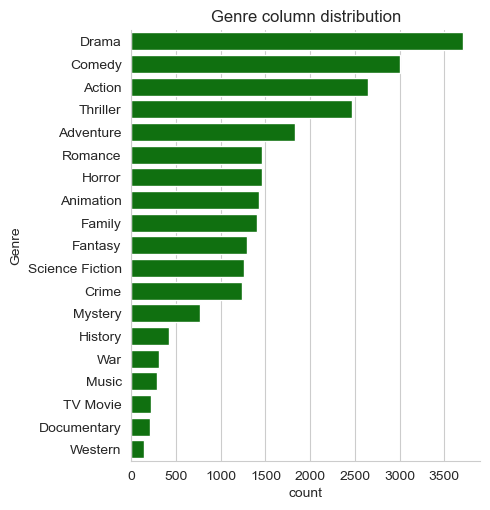

In [66]:
sns.catplot(y = 'Genre', data = df, kind= 'count',
            order = df['Genre'].value_counts().index,
            color='green')
plt.title('Genre column distribution')
plt.show()

### Which has highest votes in vote avg column?

c:\Users\Pranav Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


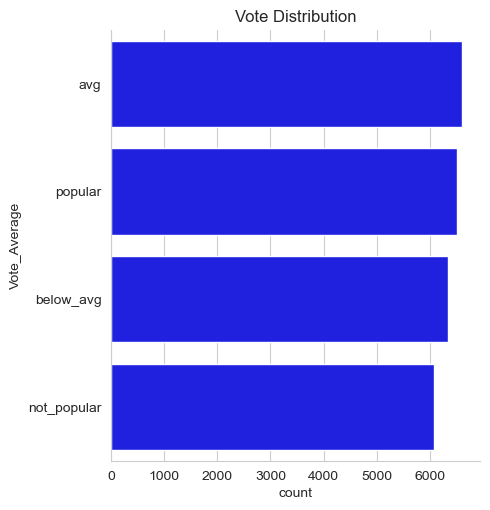

In [67]:
sns.catplot(y = 'Vote_Average', data=df, kind='count',
            order=df['Vote_Average'].value_counts().index,
            color='blue')
plt.title('Vote Distribution')
plt.show()

### What movie got the highest popularity? What's its genre?

In [68]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### What movie got the lowest popularity? What's its genre?

In [69]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,avg,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,avg,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,avg,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### What year has the most filmed movies?

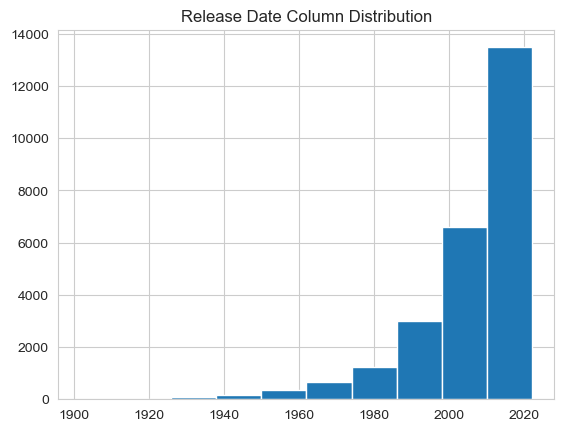

In [70]:
df['Release_Date'].hist()

plt.title('Release Date Column Distribution')
plt.show()

### Summary

Q1) What is the most frequent genre of movies released on netflix?

>`Drama` is the most frequent genre of movies released on netflix

Q2) What has highest number of votes in vote_avg column?

>'Avg' movies are the highest number of votes in vote_avg column

Q3) What movie got the highest popularity? What's its genre?

>`Spider-Man: No Way Home` got the highest popularity and its genres are `Action`, `Advanture`, `Sci-fi`.

Q4) What movie got the lowest popularity? What's its genre?

>2 movies got the lowest popularity with `13.354` those are "The United States vs. Billie Holiday" and "Threads". Their genres are "Music", "Drama", "History", "War", "Sci-fi".

Q5) Which year has the most filmed movies?

> Year 2020  has the highest filming rate.
